In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split


df=pd.read_csv('firstaiddataset.csv')
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,HeartDisease
0,40,M,140,289,0,172,N,0
1,49,F,160,180,0,156,N,1
2,37,M,130,283,0,98,N,0
3,48,F,138,214,0,108,Y,1
4,54,M,150,195,0,122,N,0
...,...,...,...,...,...,...,...,...
913,45,M,110,264,0,132,N,1
914,68,M,144,193,1,141,N,1
915,57,M,130,131,0,115,Y,1
916,57,F,130,236,0,174,N,1


In [24]:
'''Attribute Information
Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]
                                               
                                               
                                               
                                               Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations
Hungarian: 294 observations
Switzerland: 123 observations
Long Beach VA: 200 observations
Stalog (Heart) Data Set: 270 observations
Total: 1190 observations
Duplicated: 272 observations

Final dataset: 918 observations'''

"Attribute Information\nAge: age of the patient [years]\nSex: sex of the patient [M: Male, F: Female]\nChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]\nRestingBP: resting blood pressure [mm Hg]\nCholesterol: serum cholesterol [mm/dl]\nFastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]\nRestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]\nMaxHR: maximum heart rate achieved [Numeric value between 60 and 202]\nExerciseAngina: exercise-induced angina [Y: Yes, N: No]\nOldpeak: oldpeak = ST [Numeric value measured in depression]\nST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]\nHeartDisease: output class [1: heart disease, 0: Normal]\n                         

In [25]:
df.shape

(918, 8)

In [26]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000


In [27]:
df.describe(include="object")

,Sex,ExerciseAngina
count,918,918
unique,2,2
top,M,N
freq,725,547


In [28]:
df.dtypes

Age                int64
Sex               object
RestingBP          int64
Cholesterol        int64
FastingBS          int64
MaxHR              int64
ExerciseAngina    object
HeartDisease       int64
dtype: object

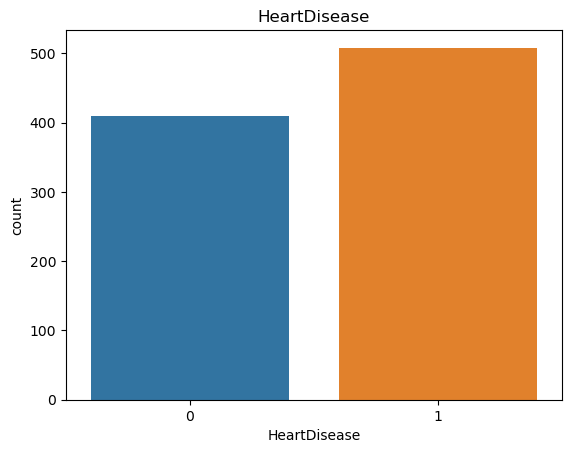

In [29]:
sns.countplot(x=df['HeartDisease'])
plt.title('HeartDisease');

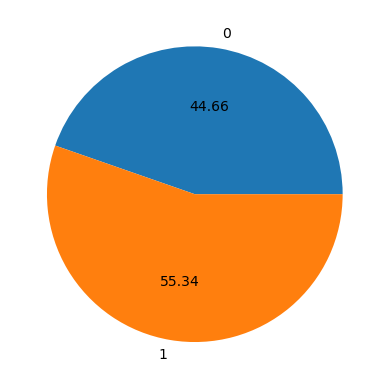

In [30]:
plt.pie(df.groupby(by=["HeartDisease"]).size(), labels = df["HeartDisease"].unique(), autopct = "%0.2f")
plt.show()

In [31]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [32]:
X=pd.get_dummies(X,dtype=float,drop_first=True)
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Sex_M,ExerciseAngina_Y
0,40,140,289,0,172,1.0,0.0
1,49,160,180,0,156,0.0,0.0
2,37,130,283,0,98,1.0,0.0
3,48,138,214,0,108,0.0,1.0
4,54,150,195,0,122,1.0,0.0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.0,0.0
914,68,144,193,1,141,1.0,0.0
915,57,130,131,0,115,1.0,1.0
916,57,130,236,0,174,0.0,0.0


In [33]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=0)

In [34]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Sex_M,ExerciseAngina_Y
279,54,130,253,0,155,0.0,0.0
451,64,144,0,0,122,1.0,1.0
39,48,150,227,0,130,0.0,1.0
557,56,137,208,1,122,1.0,1.0
548,66,112,261,0,140,1.0,0.0
...,...,...,...,...,...,...,...
835,54,110,239,0,126,1.0,1.0
192,48,130,245,0,160,1.0,0.0
629,57,128,303,0,159,0.0,0.0
559,64,134,273,0,102,1.0,1.0


In [35]:
RF_model = RandomForestClassifier(n_estimators=96)
RF_model.fit(X_train , y_train)

RandomForestClassifier(n_estimators=96)

In [36]:
RF_model.score(X_train , y_train)

1.0

In [37]:
RF_pred = RF_model.predict(X_test)

In [38]:
accuracy_score(y_test , RF_pred)

0.8130434782608695

Enter age: 49
Enter Resting BP: 160
Enter Cholesterol: 180
Enter Fasting BS (1 if > 120 mg/dl, 0 otherwise): 0
Enter MaxHR: 156
Enter Sex (0 for female, 1 for male): 0
Enter ExerciseAngina (0 for No, 1 for Yes): 0
The person is likely to have a heart attack.


<Figure size 1000x600 with 0 Axes>

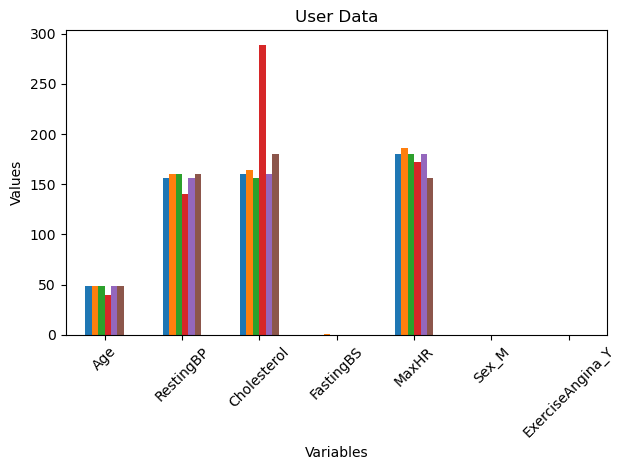

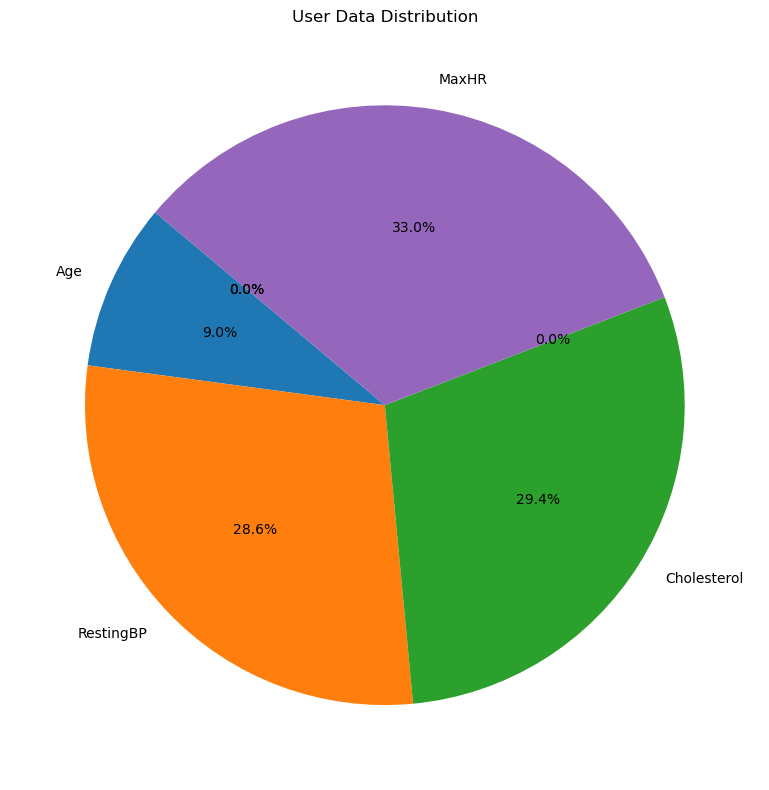

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def predict_heart_attack(Age, RestingBP, Cholesterol, FastingBS, MaxHR, Sex_M, ExerciseAngina_Y, model, threshold=0.5):
    """
    Predict whether a person will have a heart attack or not.
    
    Parameters:
        Age: Age of the person
        RestingBP: Resting blood pressure
        Cholesterol: Cholesterol level
        FastingBS: Fasting blood sugar (1 if > 120 mg/dl, 0 otherwise)
        MaxHR: Maximum heart rate achieved
        Sex_M: Sex of the person (0 for female, 1 for male)
        ExerciseAngina_Y: Exercise induced angina (0 for No, 1 for Yes)
        model: Trained Random Forest model
        threshold: Custom threshold for classification (default is 0.5)
        
    Returns:
        prediction: Predicted class label (0 for no heart attack, 1 for heart attack)
        user_data: DataFrame containing user input
    """
   
    user_data = pd.DataFrame({
        'Age': [Age],
        'RestingBP': [RestingBP],
        'Cholesterol': [Cholesterol],
        'FastingBS': [FastingBS],
        'MaxHR': [MaxHR],
        'Sex_M': [Sex_M], 
        'ExerciseAngina_Y': [ExerciseAngina_Y], 
    })
   
    prediction_proba = model.predict_proba(user_data)
    
    
    if prediction_proba[0][1] >= threshold:
        prediction = 1
    else:
        prediction = 0
    
    return prediction, user_data


csv_filename = 'user.csv'
if not os.path.isfile(csv_filename):
   
    user_data_combined = pd.DataFrame()
else:
   
    user_data_combined = pd.read_csv(csv_filename)


Age = float(input("Enter age: "))
RestingBP = float(input("Enter Resting BP: "))
Cholesterol = float(input("Enter Cholesterol: "))
FastingBS = float(input("Enter Fasting BS (1 if > 120 mg/dl, 0 otherwise): "))
MaxHR = float(input("Enter MaxHR: "))
Sex_M = float(input("Enter Sex (0 for female, 1 for male): "))
ExerciseAngina_Y = float(input("Enter ExerciseAngina (0 for No, 1 for Yes): "))

threshold = 0.22  
prediction, user_data = predict_heart_attack(Age, RestingBP, Cholesterol, FastingBS, MaxHR, Sex_M, ExerciseAngina_Y, RF_model, threshold)

if prediction == 0:
    print("The person is not likely to have a heart attack.")
else:
    print("The person is likely to have a heart attack.")


user_data_combined = pd.concat([user_data_combined, user_data], ignore_index=True)


user_data_combined.to_csv(csv_filename, index=False)


plt.figure(figsize=(10, 6))
user_data_combined.T.plot(kind='bar', legend=False)
plt.title('User Data')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('user_data_bar_chart.png')


plt.figure(figsize=(8, 8))
user_data_combined.iloc[0].plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('User Data Distribution')
plt.ylabel('')
plt.tight_layout()
plt.savefig('user_data_pie_chart.png')


plt.show()


In [46]:
import smtplib
if prediction==0:
    pass
else:
        
        email='mustang061204@gmail.com'
        receiver_email=['pawaratharav2004@gmail.com','saniya.thigale22@pccoepune.org']

        subject='This is from first aid kit'
        message='This is emergency for the heart attack patients'
        text=f"Subject:{subject}\n\n{message}"
        server=smtplib.SMTP("smtp.gmail.com",587)
        server.starttls()
        server.login(email,"mcsd nbls iyrx wbzz")
        server.sendmail(email,receiver_email,text)
        print("Email has been sent ")

Email has been sent 
